<a href="https://colab.research.google.com/github/ross-hugo/Artwork-GAN/blob/main/Discriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/ross-hugo/Artwork-GAN/
cd Artwork-GAN/

fatal: destination path 'Artwork-GAN' already exists and is not an empty directory.


In [1]:
import os
os.chdir("..")
os.getcwd()

'/Users/rosscopeland/Desktop/school/Machine_Learning_738/projects/Artwork-GAN'

In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy import ndimage

from src.generator import Generator
from src.discriminator import Discriminator
from src.sgan import SGAN

In [3]:
BATCH_SIZE = 64

In [4]:
gan = SGAN(verbosity=False)
gan.discriminator.model

In [5]:
gan.compile()

In [8]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
dir = "images/"

#divide by two because discriminator is taking other half from generator
train_ds = image_dataset_from_directory(dir,
  validation_split=0.2, subset="training",
  seed=123,
  labels="inferred",label_mode="int"
  ,image_size=(128, 128), color_mode= "rgb",
    batch_size=BATCH_SIZE//2)

val_ds = image_dataset_from_directory(dir,
  validation_split=0.2, subset="validation",
  seed=123,
  labels="inferred",label_mode="int"
  ,image_size=(128, 128), color_mode= "rgb",
    batch_size=BATCH_SIZE//2)

Found 8118 files belonging to 49 classes.
Using 6495 files for training.
Found 8118 files belonging to 49 classes.
Using 1623 files for validation.


In [9]:
gan.train(X=train_ds, y=val_ds, epochs=20, batch_size=64)

  0%|          | 0/20 [00:00<?, ?it/s]

ValueError: in user code:

    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:860 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:850 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2844 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3619 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:843 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:800 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1014 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (32, 128, 128, 3)


In [ ]:
for sample in train_ds:
    print(sample)
    break

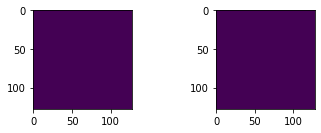

In [17]:
noise = np.random.normal(0,1,(32, 100)) #for generator
            #generate half batch of fake images
gen_imgs = gan.generator.model.predict(noise)
for i in range(2):
    ax = plt.subplot(2, 2, i+1)
    plt.imshow(gen_imgs[i].astype('uint8'))
    

In [28]:
imgs = [x for x, y in train_ds.take(1)]
imgs[0]

<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[141., 103.,  67.],
         [134.,  96.,  59.],
         [127.,  89.,  52.],
         ...,
         [103.,  74.,  56.],
         [110.,  77.,  60.],
         [115.,  82.,  65.]],

        [[140., 102.,  66.],
         [135.,  97.,  60.],
         [128.,  90.,  53.],
         ...,
         [105.,  77.,  56.],
         [109.,  76.,  57.],
         [112.,  79.,  60.]],

        [[141., 103.,  67.],
         [137.,  99.,  62.],
         [132.,  92.,  56.],
         ...,
         [105.,  77.,  55.],
         [107.,  75.,  54.],
         [108.,  76.,  55.]],

        ...,

        [[ 64.,  50.,  47.],
         [ 56.,  42.,  39.],
         [ 49.,  34.,  29.],
         ...,
         [ 81.,  32.,  36.],
         [ 78.,  27.,  32.],
         [ 77.,  26.,  31.]],

        [[ 70.,  56.,  53.],
         [ 60.,  46.,  43.],
         [ 53.,  38.,  35.],
         ...,
         [ 85.,  36.,  39.],
         [ 81.,  31.,  34.],
        

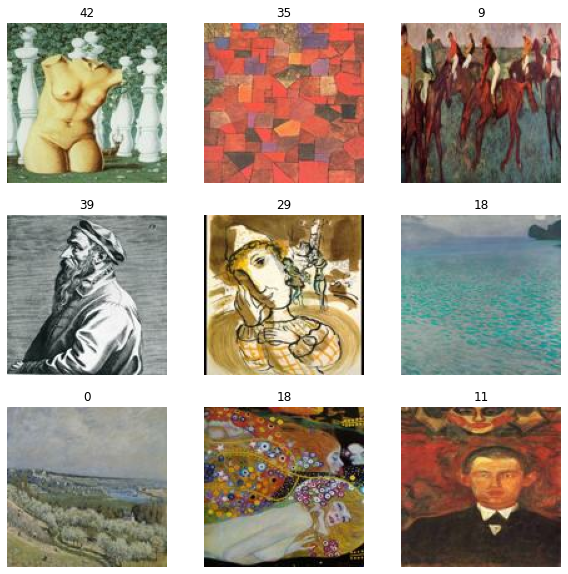

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(int(labels[i]))
      plt.axis("off")

In [ ]:
#losses: rotation loss & hinge loss (for the true versus fake prediction)
#penalties (such as the gradient penalty)
#normalization techniques: self-modulated batch normalization which doesnt require labels
#neural architecture: ResNet
#evaluation metrics: FID score
#ResNet contains 6 blocks
#I'm assuming that we will have a GAN class and inside that class we'll have the discriminator and generator functions




In [6]:
#discriminator would use a resnet architecture
#how to build a resnet as a discriminator
#what are the parameters that they've used for the ResNet?
#will start here by building the resnet
#--------> I'll continue working in the discriminator.py file

###anna's sudo code pls ignore
#for epoch in range(num_epoch):
   #train model
   #for each id in ... the dataset
      #first "optimize"
      #image = "image"
      #representation = model(image)
      # #calculate loss
      # optimize 

from keras.datasets import mnist 
# from discriminator import Discriminator
from keras.utils import to_categorical

D = Discriminator()
model = D.define_model()



def rotate_img(img, rot):
  if rot == 0:  # 0 degrees rotation
    return img
  elif rot == 90:
    return np.rot90(img,k=1, axes=(1,2))
  elif rot == 180:
    return np.rot90(img,k=2, axes=(1,2))
  elif rot == 270:
    return np.rot90(img,k=3, axes=(1,2))
  else:
    raise ValueError("rotation not valid")
  # elif rot == 90:  # 90 degrees rotation
  #     return np.flipud(np.transpose(img, (1, 0, 2)))
  # elif rot == 180:  # 90 degrees rotation
  #     return np.fliplr(np.flipud(img))
  # elif rot == 270:  # 270 degrees rotation / or -90
  #     return np.transpose(np.flipud(img), (1, 0, 2))
  # elif rot == 120:
  #     return ndimage.rotate(img, 120, reshape=False)
  # elif rot == 240:
  #     return ndimage.rotate(img, 240, reshape=False)
  # else:
  #     raise ValueError('rotation error')

def train_epoch(X, y ):
  assert len(X) == len(y)
  for i ,data in enumerate(X):
    # Get generated data from generator

    x = data
    x_90 = rotate_img(x, 90)
    x_180 = rotate_img(x, 180)
    x_270 = rotate_img(x, 270)
    new_image = np.vstack(x, x_90, x_180, x_270)

# train_data_gen = get_data_generator(X_train, y_train)
# test_data_gen = get_data_generator(X_test, y_test)

# print(model.evaluate_generator(train_data_gen))



